# Toy Example 1: Basics

Note: I'll be using separate graphs for each aspect of player performance (points, rebounds, assists, etc), and adjusting them by minutes played, but for this example I'll arbitrarily be using points per game.

### First Example

There are 2 defenses, Defense_A and Defense_B. There are also 2 players, Player_X and Player_Y.

As you can see in the edge_list dataframe below, Player_X has played against both Defense_A and Defense_B, but Player_Y has only played against Defense_B.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from functions import bipartite_draw 

In [2]:
df = pd.read_csv('toy_data1.csv')
df.head()

,defense,player,points
0,Defense_A,Player_X,20
1,Defense_B,Player_X,22
2,Defense_B,Player_Y,25


### Representation

Which players have played which team, and their performance in those matchups, can alternatively be represented by a weighted bipartite graph:

In [3]:
G = nx.from_pandas_edgelist(df, 'defense', 'player', ['points']).to_undirected()

print(nx.adjacency_matrix(G, weight='points').todense())

[[ 0 20  0  0]
 [20  0 22  0]
 [ 0 22  0 25]
 [ 0  0 25  0]]


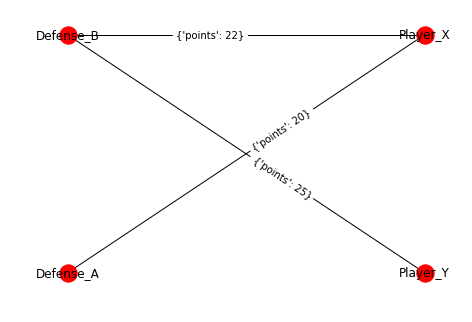

In [4]:
bipartite_draw(G)

We can use this information/representation to infer what would happen if players hypothetically played against defenses that they didn't - allowing us to "guess" what would happen if every defense played every player, giving us a way to standardize statistics by defense, because we can now compare defenses.

### Prediction Example: If Player_Y played Defense_A

This path between Defense_A and Defense_B gives us information about Defense_A compared to Defense_B:

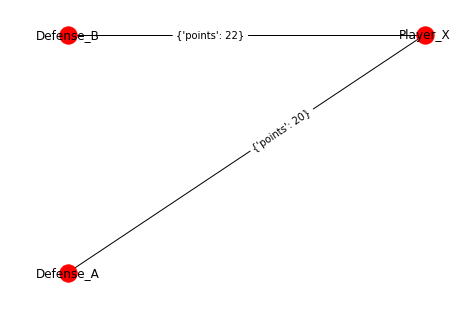

In [5]:
bipartite_draw(G, ['Defense_A', 'Defense_B', 'Player_X'])

Therefore, from this triangle, we can expect Defense_A to allow (20/22) = 0.91 as many points as Defense_B does to the same opponent

NOTE: TYPESET

And while Defense_A  hasn't played Player_Y, Defense_B *has*:

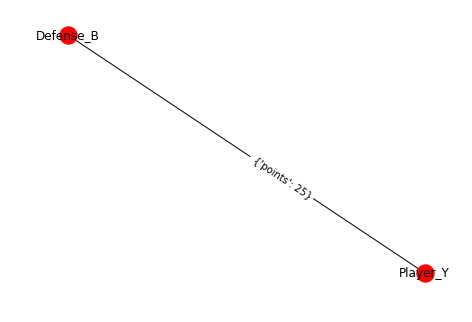

In [6]:
bipartite_draw(G, ['Defense_B', 'Player_Y'])

Because, from before, we expect Defense_A to allow 0.91 as many points as Defense_B, and Defense_B allowed 25 points to Player_Y, we expect Defense_A to allow 0.91 * 25 = 22.75 points to Player_Y.

Put together and generalized: 

Y-A = (A-X/B-X) * (B-Y)

TYPESET generalized equation - clean up

### Extension

This is one triangle (B-X)'s prediction for A-Y. In the real graph, there are many triangles for each game that hasn't been played yet, so we need to implement a triangle selection method.